In [1]:
import os
from keras.utils import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

2022-12-28 18:52:18.322495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
rescale_size=1./255
rotation_range=40 # range within which we randomly rotate pictures
width_shift_range=0.2 # range withing which we shift image horizontally
height_shift_range=0.2 # range withing which we shift image vertically
shear_range=0.2 # random shearing transformation
zoom_range=0.2 # random zoom inside pictures
horizontal_flip=True
fill_mode='nearest' # strategy to fill newly created pixels after rotation or shift
input_height = 69
input_width = 69
batch_size=20

In [6]:
paths = {
    'IMAGES_PATH' : os.path.join('..','workspace', 'images', 'all'),
    'TRAIN_PATH' : os.path.join('..','workspace', 'images', 'train'),
    'TEST_PATH' : os.path.join('..','workspace', 'images','test'),
    'EVAL_PATH' : os.path.join('..','workspace', 'images','eval')
 }

In [11]:
train_datagen = ImageDataGenerator(
          rescale=rescale_size,
          rotation_range=rotation_range,
          width_shift_range=width_shift_range,
          height_shift_range=height_shift_range,
          shear_range=shear_range,
          zoom_range=zoom_range,
          horizontal_flip=horizontal_flip,
          fill_mode=fill_mode)

train_dir=paths['TRAIN_PATH']

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(input_width, input_height), batch_size=batch_size, class_mode='categorical')

Found 15684 images belonging to 10 classes.


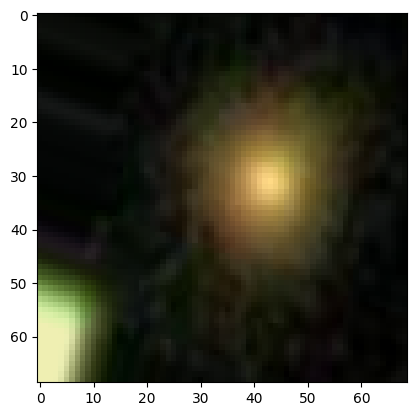

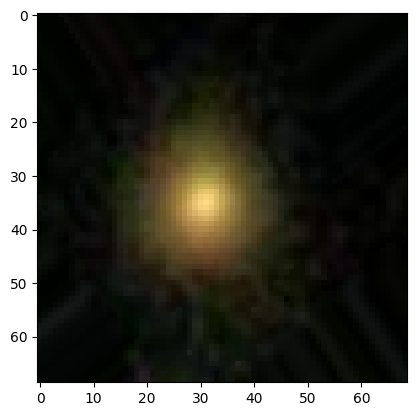

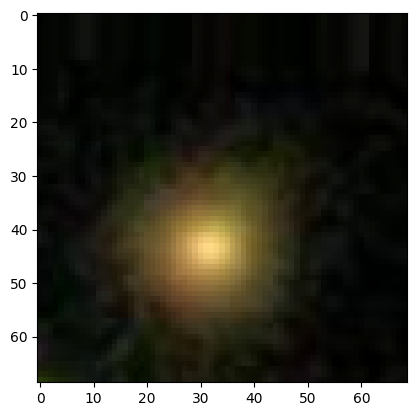

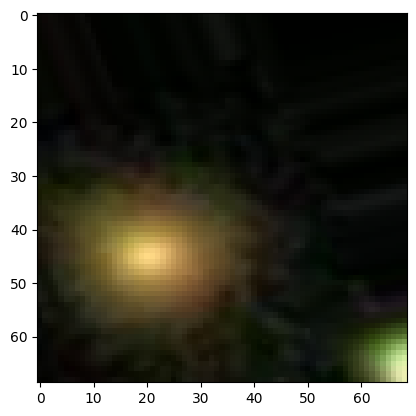

In [12]:
image_index = 1
class_index = 1
fnames = [os.path.join(os.path.join(train_dir,str(class_index)), fname) for
     fname in os.listdir(os.path.join(train_dir,str(class_index)))]
img_path = fnames[image_index]
img = load_img(img_path, target_size=(69, 69))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()